# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [93]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [94]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [95]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

#comment: added a dropout factor in the loss function, if this is not set to  p = 1 
# (no dropout), there will be a difference in loss and gradient

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [96]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [98]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
b1 max relative error: 1.555470e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.02818386975515035


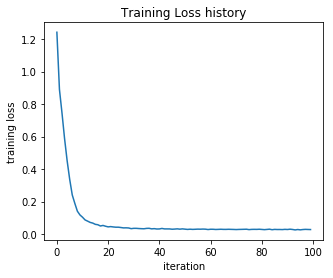

In [99]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [195]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    
    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test, mean_image


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, mean_image = get_CIFAR10_data()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


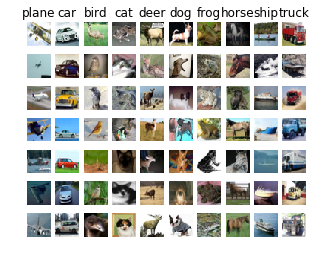

In [101]:
#now we will visualize some of the examples. First we create X_train_display to be able
# to display the images:

X_train_display = X_train.reshape(49000,32,32,3) + mean_image # change dim X_train and add mean

# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train_display[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Covariance matrix shape: (3072, 3072)


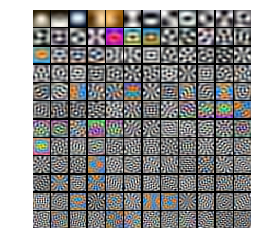

In [103]:
# calculate the covariance matrix to perform PCA, U is the matrix with eigenvectors, 
# U^T * U = I

def covariance(X_train):
    cov = np.dot(X_train.T, X_train) / (X_train.shape[0]-1) # get the data covariance matrix
    U,S,V = np.linalg.svd(cov)
    return U

U = covariance(X_train)

print('Covariance matrix shape:',U.shape)

# showing the first 144 eigenvectors
U_red = U[:,:144]
U_reshape = U_red.reshape(32, 32, 3,-1).transpose(3, 0, 1, 2)
plt.imshow(visualize_grid(U_reshape, padding=3).astype('uint8'))
plt.gca().axis('off')
plt.show()


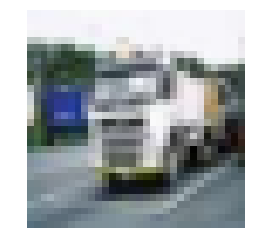

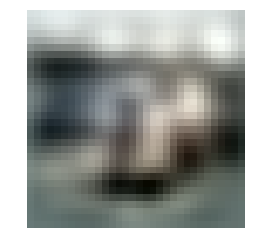

In [197]:
# let's see what PCA can do, choose a picture and the dimensions left (max = 3072)

# define the PCA data function, to rotate X to lower dimensionality
def PCA(X,N,U=U):
    X_rot_red = np.dot(X, U[:,:N])
    return X_rot_red

# define the rotation back
def unPCA(X,N,U=U):
    X_rotback = np.dot(U[:,:N],X.T)
    return X_rotback

def PCA_pic(num_pic,rem_dim):
    pic_1 = X_train[num_pic,:] # select the picture
    pic_test = pic_1.reshape(32, 32, 3,-1).transpose(3, 0, 1, 2) # convert back from row only
    pic_test += mean_image # correct for mean image
    plt.imshow(visualize_grid(pic_test, padding=3).astype('uint8'))
    plt.axis('off') 
    plt.show() #plot the picture
    
    pic_test_rot = PCA(pic_1,rem_dim) # transform the picture using PCA
    pic_test_rotback = unPCA(pic_test_rot,rem_dim) #rotate back
    
    # plot the rotation
    pic_red = pic_test_rotback.reshape(32, 32, 3,-1).transpose(3, 0, 1, 2)
    pic_red += mean_image
    plt.imshow(visualize_grid(pic_red, padding=3).astype('uint8'))
    plt.axis('off')
    plt.show()

PCA_pic(1000,100)

In [198]:
# let's use PCA on our dataset

X_train_rot = PCA(X_train,300)
X_test_rot = PCA(X_test,300)
X_val_rot = PCA(X_val,300)

print('Train data shape: ', X_train_rot.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val_rot.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test_rot.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 300)
Train labels shape:  (49000,)
Validation data shape:  (1000, 300)
Validation labels shape:  (1000,)
Test data shape:  (1000, 300)
Test labels shape:  (1000,)


In [ ]:
# To visualize some of the images from the X_train dataset, we need to transform them back 

def PCA(X,N,U=U): # define the rotation
    X_rot_red = np.dot(X, U[:,:N])
    return X_rot_red

def unPCA(X,N,U=U): # define the rotation back
    X_rotback = np.dot(U[:,:N],X.T)
    return X_rotback

X_train_red = unPCA(X_train_rot,300) # rotate back
#return the picture to right dims, transpose due to rotation & fix mean
mean_image_row = mean_image.reshape(-1)
mean_rot = PCA(mean_image_row,300)
mean_red = unPCA(mean_rot,300)
mean_red = mean_red.reshape(32,32,3,-1).transpose(3,0,1,2)

X_train_red = X_train_red.reshape(32, 32, 3,-1).transpose(3, 0, 1, 2) + mean_red
print(X_train_red.shape)


In [199]:
# the same way of doing it, without having to transpose 
# (this seems easier to me mathematically since, PCA(unPCA(X)) = X (in above it is X.T)

def PCA(X,N,U=U): # define the rotation
    X_rot_red = np.dot(X, U[:,:N])
    return X_rot_red

def unPCA(X,N,U=U): # define the rotation back
    X_rotback = np.dot(X,U.T[:N,:])
    return X_rotback

X_train_red = unPCA(X_train_rot,300) # rotate back
#return the picture to right dims, transpose due to rotation & fix mean
mean_image_row = mean_image.reshape(-1)
mean_rot = PCA(mean_image_row,300)
mean_red = unPCA(mean_rot,300)
mean_red = mean_red.reshape(-1,32,32,3)

X_train_red = X_train_red.reshape(49000,32, 32, 3) + mean_red
print(X_train_red.shape)


(49000, 32, 32, 3)


In [176]:
#you can achieve PCA also through a standard package

from sklearn.decomposition import PCA

n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)

print(X_train_pca.shape) # printing the shape

# transforming back

X_train_red = pca.inverse_transform(X_train_pca)
X_train_red = X_train_red.reshape(49000,32, 32, 3) + mean_red

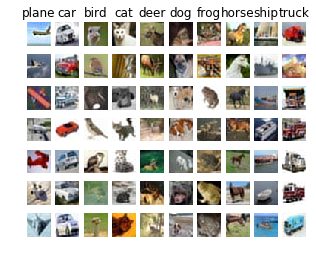

In [200]:
# Visualizing some examples from the dataset is now easy
# We show a few examples of training images from each class.
# uint 8 gives a problem with pixels not displaying correctly. this problem is solved through
# using int32 instead

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train_red[idx].astype('int32'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [148]:
input_size = 300
hidden_size = 140
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train_rot, y_train, X_val_rot, y_val,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, num_iters=2700, batch_size=200, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val_rot) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 2700: loss 2.302710
iteration 100 / 2700: loss 2.301588
iteration 200 / 2700: loss 2.294017
iteration 300 / 2700: loss 2.260748
iteration 400 / 2700: loss 2.222307
iteration 500 / 2700: loss 2.077862
iteration 600 / 2700: loss 2.081736
iteration 700 / 2700: loss 2.055928
iteration 800 / 2700: loss 1.977168
iteration 900 / 2700: loss 2.010908
iteration 1000 / 2700: loss 1.957791
iteration 1100 / 2700: loss 1.942599
iteration 1200 / 2700: loss 2.018161
iteration 1300 / 2700: loss 1.830325
iteration 1400 / 2700: loss 1.887236
iteration 1500 / 2700: loss 1.839039
iteration 1600 / 2700: loss 1.899217
iteration 1700 / 2700: loss 1.824019
iteration 1800 / 2700: loss 1.737635
iteration 1900 / 2700: loss 1.938309
iteration 2000 / 2700: loss 1.859764
iteration 2100 / 2700: loss 1.774360
iteration 2200 / 2700: loss 1.742639
iteration 2300 / 2700: loss 1.771982
iteration 2400 / 2700: loss 1.857640
iteration 2500 / 2700: loss 1.850246
iteration 2600 / 2700: loss 1.866635
Validation ac

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

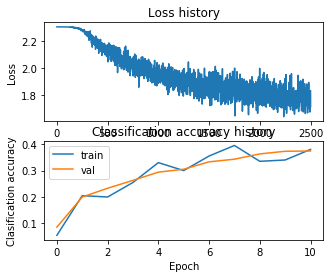

In [146]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')


plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

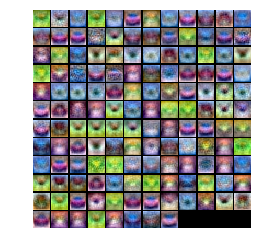

In [149]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net,N):
    W1 = net.params['W1']
    W1 = np.dot(U[:,:N],W1)
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net,input_size)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [160]:
from cs231n.classifiers.neural_net import TwoLayerNet
import time

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

best_net = None # store the best model into this 
results = {}
best_val = -1
num_classes = 10

steps_learn = 6
steps_reg = 4
steps_hidden = 3
model_total = steps_learn * steps_reg * steps_hidden

learning_rates_list = {}
regularization_strengths_list = {}
hidden_layer_list = {}

input_dim = X_train_rot.shape[1]

for i in range(0, steps_learn):
    a = np.random.uniform(2.2e-3, 2.8e-3)
    learning_rates_list[i] = a

for j in range(0, steps_reg):
    b = np.random.uniform(0.25, 0.4)
    regularization_strengths_list[j] = b

for k in range(0, steps_hidden):
    c = int(np.random.uniform(120, 160))
    hidden_layer_list[k] = c
    
a = np.arange(0,len(learning_rates_list))
b = np.arange(0,len(regularization_strengths_list))
c = np.arange(0,len(hidden_layer_list))

for k in c:
    hid = hidden_layer_list[k]
    for i in a:
        lr = learning_rates_list[i]
        for j in b:
            tic = time.time()
            net = TwoLayerNet(input_dim, hid, num_classes)
            reg = regularization_strengths_list[j]
            
            stats = net.train(X_train_rot, y_train, X_val_rot, y_val,
            num_iters=2700, batch_size=400,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
            y_train_pred = net.predict(X_train_rot)
            y_val_pred = net.predict(X_val_rot)
            train_accuracy = np.mean(y_train == y_train_pred)
            val_accuracy = np.mean(y_val == y_val_pred)
            results[(learning_rates_list[i],regularization_strengths_list[j],hidden_layer_list[k])] = train_accuracy, val_accuracy
            if val_accuracy > best_val:
                best_val = val_accuracy
                best_net = net
            toc = time.time()
            model = k*len(a)*len(b)+i*len(b)+j+1
            print('model: {0} / {1} computed in {2}s'.format(model, model_total, toc - tic))


for lr, reg, hid in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hid)]
    print('lr {0} reg {1} hid {2} train accuracy: {3} val accuracy: {4}'.format(
                lr, reg, hid, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: {}'.format(best_val))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

model: 1 / 72 computed in 17.414124012s
model: 2 / 72 computed in 16.0949912071s
model: 3 / 72 computed in 15.6967310905s
model: 4 / 72 computed in 16.5893399715s
model: 5 / 72 computed in 16.3105039597s
model: 6 / 72 computed in 16.2368099689s
model: 7 / 72 computed in 16.4566550255s
model: 8 / 72 computed in 16.4227280617s
model: 9 / 72 computed in 16.3154878616s
model: 10 / 72 computed in 16.1657497883s
model: 11 / 72 computed in 16.6559998989s
model: 12 / 72 computed in 16.5576508045s
model: 13 / 72 computed in 16.1998491287s
model: 14 / 72 computed in 15.9071979523s
model: 15 / 72 computed in 16.2287271023s
model: 16 / 72 computed in 15.9236299992s
model: 17 / 72 computed in 15.7734200954s
model: 18 / 72 computed in 15.8041660786s
model: 19 / 72 computed in 15.8192920685s
model: 20 / 72 computed in 15.977355957s
model: 21 / 72 computed in 15.9279060364s
model: 22 / 72 computed in 16.0341989994s
model: 23 / 72 computed in 15.9439430237s
model: 24 / 72 computed in 15.8600599766s
mod

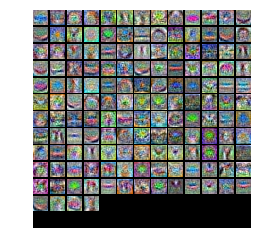

In [163]:
# visualize the weights of the best network
show_net_weights(best_net,input_size)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [162]:
test_acc = (best_net.predict(X_test_rot) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.539


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: 1 and 3 will help. first of all will a larger dataset (batch) be a potentially better representation of the data. The regularization strength might help prevent overfitting of the network. However, you can turn it up too much leading to limited learning capacity of the network.

Adding more hidden units will generally not help. It can create better accuracy on training set by using more parameters to find correlations. The fitting will however be solely done on the training set, and not account to better relative fitting of the testing set

*Your explanation:*